# Stochastic Gradient Descent for Logistic Regression.
In this project
we implement binary logistic regression. The primary goal in this exericse
is to experiment with the gradient and stochastic gradient descent methods
which will be used to determine the optimal parameters w.

In [ ]:
# importing the libraries.
import numpy as np
import matplotlib.pyplot as plt
import math as m
import random



def learning_rate_schedule(t):  # This function compute the learning rate
                                    #at each iteration of gradient descent method.
    val = 1/pow(t, 0.5)               # t is the iteration number.
    return val


def sigmoid(z):       # defining the sugmoid function .
    val = 1/(1 + np.exp(-z))
    return val



def cost_function(w, X, y):    # defining the cost function i.e. negetive log likelihood.(NLL(W)])
    r, c = np.shape(X)          # where w is the vector with the parameters, and X, y are the training data.
    theta = np.zeros(r)
    error = 0
    for i in range(r):
        if(y[i] == 1):
            val1 = sigmoid(np.dot(w, X[i]))
            val1 = np.log(val1)
            error += val1
        else:
            val2 = sigmoid(np.dot(w, X[i]))
            val2 = np.log(1- val2)
            error += val2

    error = -(error/r)
    return error             # returning cost value.



def fullGradient(w, X, y):   # defining the full gradient function . It computes the gradiient at the point w.
    r, c = np.shape(X)        # where w is the vector with the parameters, and X, y are the training data.
    grad = np.zeros(c)
    for i in range(r):
        grad += (sigmoid(np.dot(w, X[i])) - y[i])*X[i]

    grad = grad/r
    return grad        # returning the gredient at the point w.




def randGradient(w, X, y, n):  # defining the randfgradient function . where n is the randomly selected component.
    r, c = np.shape(X)
    grad = (sigmoid(np.dot(w, X[n])) - y[n])*X[n]

    return grad    # returning the gradient on the randomly selected component n.


def fdescent(X, y, rho, job, nEpoch):   # defining the fdescent function.
    r, c = np.shape(X)                 # where job selects either the full gradient or the stochastic gradient method.
    eps = 10e-5                       # rho is a predetermined learning rate schedule.
                                     #nEpoch indicates how many times a new random
                                    #permutation is determined in the course of the descent method.
    iteration = 1
    iterates = []
    f = []
    w = np.ones(c)               # initial guess for parameter vector is the vector whose components are one.
    iterates.append(w)           # iterates is a list which will store the updated parameters at each iterations.


    if(job == fullGradient):    # if job is full Gradient then we will get optimal parameter vector w will be computed
        grad = job(w, X, y)                            # by the gradient descent method.

        while(iteration < (r*nEpoch)):
            print(f'At {iteration}-th interation, the value of W is {w}')
            loss1 = cost_function(w, X, y)  # calculating the cost using the cost function at each iteration.
            f.append(loss1)                 # And also store in a list which is named as f.

            direction = -grad
            rho_t = rho(iteration)
            w = w + (rho_t*direction)      # iteration method : w(k+1) = w(k) + rho*direction.
            iterates.append(w)             # where direction is steepest descent/gradient direction.
            iteration += 1
            grad = job(w, X, y)       # computing the gradient by full gradient method.

    if(job == randGradient):  # if job is full Gradient then we will get optimal parameter vector w will be computed
                                            # by the stochastic gradient method.
        for epoch in range(nEpoch):
            indices = np.random.permutation(r)   # defining the random permutation of indices of samples.
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, r):
                print(f'At {iteration}-th interation, the value of W is {w}')
                loss2 = cost_function(w, X_shuffled, y_shuffled) #calculating the cost using the cost function at each iteration.
                f.append(loss2)                        # And also store in a list which is named as f.

                grad = job(w, X_shuffled, y_shuffled, i)  # computing the gradient by stochastic gradient method.
                direction = - grad
                rho_t = rho(iteration)
                w = w + (rho_t*direction)      # iteration method : w(k+1) = w(k) + rho*direction.
                iterates.append(w)
                iteration += 1

            if np.linalg.norm(w) < eps:        # if two norm of graient is less than tolerence error, then iteration stops.
                print("Convergence reached.")
                break

    f = np.array(f).reshape((len(f), 1))
    return w, f                # returning the optimal parameter vector and list of costs computed at each iterations.


def compare(w1, w2, X_test, y_test):     # defining the compare function . where w1 and w2 are optimal parameter vectors
                                        # computed using full gradient and SGD respectively.
    r, c = np.shape(X_test)
    y_test_pred1 = np.zeros(r, dtype = int)
    probability1 = np.zeros(r)

    for i in range(r):         # computing the probabilities using w1 vector and predicts labels also.
        val1 = sigmoid(np.dot(w1, X_test[i]))
        probability1[i] = val1
        if(val1 > 0.5):
            y_test_pred1[i] = 1

    y_list1 = list(y_test)
    y_test_pred_list1 = list(y_test_pred1)

    y_test1 = y_test.reshape(len(y_test))
    y_test1_list = list(y_test1)

    count1 = 0              # counting the misclassified days using full gradient descent method.
    for i in range(r):
        if(y_test1_list[i] != y_test_pred_list1[i]):
            count1 += 1

    print(f'The no. of misclassified days at full gradient descent method is: {count1}')

    accur1 = (len(y_test1) - count1)/len(y_test1)
    print(f'The accuracy in full gradient descent method is: {accur1}')


    y_test_pred2 = np.zeros(r, dtype = int)
    probability2 = np.zeros(r)

    for i in range(r):           # computing the probabilities using w1 vector and predicts labels also.
        val2 = sigmoid(np.dot(w2, X_test[i]))
        probability2[i] = val2
        if(val2 > 0.5):
            y_test_pred2[i] = 1

    y_list2 = list(y_test)
    y_test_pred_list2 = list(y_test_pred2)

    count2 = 0            # counting the misclassified days using stochastic gradient descent method.
    for i in range(r):
        if(y_test1_list[i] != y_test_pred_list2[i]):
            count2 += 1

    print(f'The no. of misclassified days at SGD gradient descent method is: {count2}')

    accur2 = (len(y_test1) - count2)/len(y_test1)
    print(f'The accuracy in full gradient descent method is: {accur2}')


    merged_arrays = zip(y_test1, probability1, y_test_pred_list1, probability2, y_test_pred_list2)

    # pandas Dataframe. Using it reates a table that contains for each test
    #point the probabilies and classifiers of both optimization methods, and the
    #actual direction from the test set.

    df = pd.DataFrame(merged_arrays, columns=['Ground Truth', 'FG Prob.', 'FG prediction', 'SGD prob.','SGD prediction'])

    df['Ground Truth'] = df['Ground Truth'].apply(lambda x: 'Up' if x == 1 else 'Down')
    df['FG prediction'] = df['FG prediction'].apply(lambda x: 'Up' if x == 1 else 'Down')
    df['SGD prediction'] = df['SGD prediction'].apply(lambda x: 'Up' if x == 1 else 'Down')

    # Print data.
    print(df[0:60])
    print(df[60: 120])
    print(df[120: 180])
    print(df[180: 230])
    print(df[230:])



In [ ]:
import pandas as pd

data = pd.read_csv('smarket.csv')    # reads the smarket csv file using pandas library.

one_hot_encoded_data = pd.get_dummies(data, columns = ['Direction'], dtype = int)  # changing Up to 1 and Down to 0 .
#print(one_hot_encoded_data)


# the correlation matrix, leaving out the first column (i.e., the year).
corr_data = one_hot_encoded_data[one_hot_encoded_data.columns[1 : (len(one_hot_encoded_data.columns)-2)]]
corr_matrix = corr_data.corr()

print('-------------------The correlation matrix is :--------------------------')
print(corr_matrix)

print('')

# extracting the ground truth label column from the data set.
y = one_hot_encoded_data[['Direction_Up']]
y = y.values
y_train = y[0:998]    # splitting the target column into the training and test set.
y_test = y[998:]

#print('--------------------The training target column is : ------------------------')
#print(y_train)

#print('--------------------The testing target column is : ------------------------')
#print(y_test)

# extracting the features from the adta set.
features = one_hot_encoded_data[one_hot_encoded_data.columns[1 : (len(one_hot_encoded_data.columns)-2)]]
features = features.values

r, c = np.shape(features)

for i in range(c):     # normalizing the features.
    features[:,i] = (features[:,i] - features[:,i].mean())/features[:,i].std()


x0 = np.ones((r, 1)) # for bias we concatenate one vector as a first vector.
X = np.concatenate((x0, features), axis = 1)

X_train = X[0:998, :]     # splitting the design matrix into the training and test set.
X_test = X[998 : , :]

r, c = np.shape(X)
print(r, c)
print('\n -------------------- The training design matrix is : -------------------------')
print(X_train)

print('\n -------------------- The testing design matrix is : -------------------------')
print(X_test)


-------------------The correlation matrix is :--------------------------
            Lag1      Lag2      Lag3      Lag4      Lag5    Volume     Today
Lag1    1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910 -0.026155
Lag2   -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383 -0.010250
Lag3   -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824 -0.002448
Lag4   -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414 -0.006900
Lag5   -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002 -0.034860
Volume  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000  0.014592
Today  -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592  1.000000

1250 8

 -------------------- The training design matrix is : -------------------------
[[ 1.00000000e+00  3.32057503e-01 -1.72490557e-01 ...  4.36267914e+00
  -7.96764875e-01  8.41516759e-01]
 [ 1.00000000e+00  8.40930096e-01  3.31988276e-01 ... -9.24607995e-01
  -5.04715382e-01  9.05784142e-01]
 [ 1.0000000

# Which variables show a significant correlation?

Based on these correlations, it seems that the connection between "Volume" and "Lag4" (-0.048414) is the only one that really sticks out as significant (in absolute value). This suggests that there is a somewhat strong negative association between "Lag4" and "Volume". Other connections have smaller magnitudes and might not be important in the absence of more information.


In [ ]:
# calling the full gradient descent method to compute the optimal weight vector that minimizes the cost function.

w1, f1 = fdescent(X_train, y_train, learning_rate_schedule, fullGradient, 3)



Streaming output truncated to the last 5000 lines.
At 494-th interation, the value of W is [ 0.13919855 -0.03185121 -0.07764054  0.06993616  0.02154526  0.07209123
  0.12454889  4.08857958]
At 495-th interation, the value of W is [ 0.13906532 -0.03180512 -0.07769913  0.06987214  0.02146671  0.07204081
  0.12429221  4.09011472]
At 496-th interation, the value of W is [ 0.1389325  -0.03175905 -0.07775743  0.0698084   0.02138847  0.07199067
  0.12403632  4.0916474 ]
At 497-th interation, the value of W is [ 0.13880007 -0.03171299 -0.07781546  0.06974495  0.02131055  0.0719408
  0.12378122  4.09317762]
At 498-th interation, the value of W is [ 0.13866802 -0.03166693 -0.07787319  0.06968179  0.02123293  0.0718912
  0.12352692  4.09470539]
At 499-th interation, the value of W is [ 0.13853637 -0.0316209  -0.07793065  0.0696189   0.02115562  0.07184188
  0.1232734   4.09623072]
At 500-th interation, the value of W is [ 0.13840511 -0.03157487 -0.07798783  0.06955629  0.02107862  0.07179282
  0.

In [ ]:
# calling the stochastic gradient descent method to compute the optimal weight vector that minimizes the cost function.
w2, f2 = fdescent(X_train, y_train, learning_rate_schedule, randGradient, 3)



Streaming output truncated to the last 5000 lines.
At 495-th interation, the value of W is [ 0.18763735 -0.03097081 -0.11956219  0.01444722 -0.07764847  0.32520053
  0.03498949  4.11391833]
At 496-th interation, the value of W is [ 0.16568914 -0.0849825  -0.07896493  0.00967898 -0.07098418  0.28426588
  0.04278898  4.11925406]
At 497-th interation, the value of W is [ 0.17308444 -0.09476069 -0.07815054  0.01302033 -0.07764741  0.28626697
  0.04625645  4.12138864]
At 498-th interation, the value of W is [ 0.15781446 -0.09793564 -0.09214677 -0.00852851 -0.05580006  0.30813324
  0.06588394  4.12288271]
At 499-th interation, the value of W is [ 0.15731936 -0.09820204 -0.09321868 -0.00850689 -0.05613513  0.30903041
  0.06599143  4.12333783]
At 500-th interation, the value of W is [ 0.15941901 -0.09861211 -0.09482494 -0.00632785 -0.05859874  0.30787979
  0.06407952  4.12483299]
At 501-th interation, the value of W is [ 0.15308464 -0.10079914 -0.09696691 -0.00941802 -0.05798865  0.30658546
  

# Which methods gives better results and which method uses fewer floating point operations?

Full gradient method gives the better result . And stochastic gradient method uses fewer floating point operation.

In [ ]:
print(f'The optimal weight evaluated by full gradient descent method is :')
print(w1)

optimal_loss1 = cost_function(w1, X_train, y_train)
print(f'The optimal loss at full gradient descent method is : {optimal_loss1}')

print('\n')

print(f'The optimal weight evaluated by stochastic gradient descent method is :')
print(w2)

optimal_loss2 = cost_function(w2, X_train, y_train)
print(f'The optimal loss at stochastic gradient descent method is : {optimal_loss2}')

compare(w1, w2, X_test, y_test)  # calling the compare function which will give the number of misclassified days.

The optimal weight evaluated by full gradient descent method is :
[ 6.69396476e-02  1.28117845e-02 -9.31531796e-02  5.07348253e-02
 -8.04931760e-03  6.80930684e-02 -2.62898843e-03  5.73082311e+00]
The optimal loss at full gradient descent method is : 0.12860209519508153


The optimal weight evaluated by stochastic gradient descent method is :
[ 0.02128255  0.01956389 -0.07652834  0.0282949  -0.03765689  0.05597096
  0.01974864  5.76690104]
The optimal loss at stochastic gradient descent method is : 0.12805667618460118
The no. of misclassified days at full gradient descent method is: 1
The accuracy in full gradient descent method is: 0.996031746031746
The no. of misclassified days at SGD gradient descent method is: 1
The accuracy in full gradient descent method is: 0.996031746031746
   Ground Truth  FG Prob. FG prediction  SGD prob. SGD prediction
0          Down  0.016727          Down   0.014732           Down
1          Down  0.003041          Down   0.002766           Down
2        

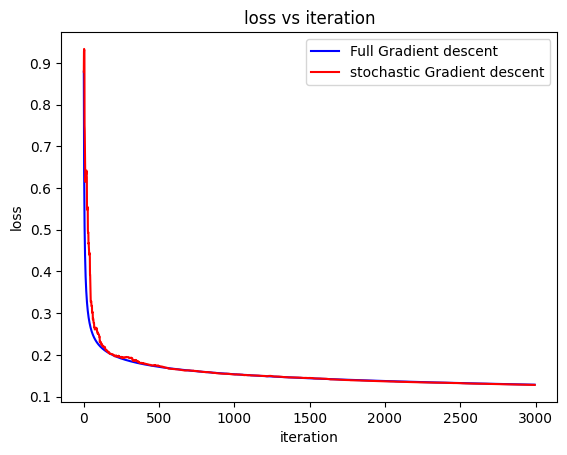

In [ ]:
#plotting the loss vs iteration graph.

n_iteration1, c1 = np.shape(f1)  # array of costs at each iteration
n_iteration1 = list(range(1, n_iteration1+1))
n_iteration1 = np.array(n_iteration1).reshape((len(n_iteration1), 1))

n_iteration2, c2 = np.shape(f2)
n_iteration2 = list(range(1, n_iteration2+1))
n_iteration2 = np.array(n_iteration2).reshape((len(n_iteration2), 1))

plt.plot(n_iteration1, f1, color = 'blue', label = 'Full Gradient descent')
plt.plot(n_iteration2, f2, color = 'red', label = 'stochastic Gradient descent')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss vs iteration')
plt.legend()
plt.show()

# Is this a get rich quick scheme?
If you have done everything right you
will have few misclassified points. This seems to suggest that we now have
a way to predict the stockmarket and make a lot of money by investing in
the S&P on days our classifier says it goes up. The problem is that the
volume and the return variables are only available after the fact, meaning
the volume is only known at the end of the day for which we want to predict
the direction.


To make our model work as a predictor of the direction of the following
day you simply have to move the last column one unit up. Then the n-th
row contains the direction of the stock market for the n + 1-st day. This way
the first entry in this column is lost and the last row with no entry in the last
column must be deleted, but this is inconsequential. Run the classification
again with this modified data set. How many days are you misclassifying
with the modified data set?

In [ ]:
import pandas as pd

data1 = pd.read_csv('smarket.csv') # reads the smarket csv file using pandas library.

one_hot_encoded_data1 = pd.get_dummies(data1, columns = ['Direction'], dtype = int)  # changing Up to 1 and Down to 0.
#print(one_hot_encoded_data)

y1 = one_hot_encoded_data1[['Direction_Up']]
y1 = y1.values

y_train1 = y1[1:999]   # Here , we do not take the 0-th index value and split it into train and test set.
y_test1 = y1[999:]

#print('--------------------The training target column is : ------------------------')
#print(y_train)

#print('--------------------The testing target column is : ------------------------')
#print(y_test)


features_1 = one_hot_encoded_data1[one_hot_encoded_data1.columns[1 : (len(one_hot_encoded_data1.columns)-2)]]
features_1 = features_1.values

r, c = np.shape(features_1)

for i in range(c):      # normalizing the feature vectors.
    features_1[:,i] = (features_1[:,i] - features_1[:,i].mean())/features_1[:,i].std()

x0 = np.ones((r, 1))
X1 = np.concatenate((x0, features_1), axis = 1)  #

X_train1 = X1[0:998, :]
X_test1 = X1[998 : (len(X1)-1), :]   # Here, we do not take the last row of design matrix and split it into train and test set.

print('\n -------------------- The training design matrix is : -------------------------')
print(X_train1)

print('\n -------------------- The testing design matrix is : -------------------------')
print(X_test1)


 -------------------- The training design matrix is : -------------------------
[[ 1.00000000e+00  3.32057503e-01 -1.72490557e-01 ...  4.36267914e+00
  -7.96764875e-01  8.41516759e-01]
 [ 1.00000000e+00  8.40930096e-01  3.31988276e-01 ... -9.24607995e-01
  -5.04715382e-01  9.05784142e-01]
 [ 1.00000000e+00  9.05199472e-01  8.40869193e-01 ... -2.29241566e+00
  -1.86292597e-01 -5.51236661e-01]
 ...
 [ 1.00000000e+00  6.26111908e-01 -3.82910176e-01 ...  7.83190107e-01
  -1.37503398e+00 -8.92559499e-03]
 [ 1.00000000e+00 -9.53863187e-03  6.26047491e-01 ...  2.93255174e-01
  -1.53355133e+00  4.28003162e-03]
 [ 1.00000000e+00  3.66740428e-03 -9.61344725e-03 ...  3.52111529e-02
  -1.80033799e+00 -1.20733234e-01]]

 -------------------- The testing design matrix is : -------------------------
[[ 1.         -0.12134974  0.0035928  ... -0.3806233  -1.91943422
  -0.71762756]
 [ 1.         -0.71826257 -0.12142638 ...  0.61842551  0.09021054
  -1.03016072]
 [ 1.         -1.03080543 -0.71834898 ...

In [ ]:
# calling the full gradient descent method to compute the optimal weight vector that minimizes the cost function.

w_1, f_1 = fdescent(X_train1, y_train1, learning_rate_schedule, fullGradient, 3)



Streaming output truncated to the last 5000 lines.
At 494-th interation, the value of W is [ 0.05781801 -0.05358578  0.01801937  0.01420275 -0.00584704 -0.0230662
  0.08491211 -0.06475079]
At 495-th interation, the value of W is [ 0.05777577 -0.05358129  0.01801393  0.01419657 -0.00585425 -0.02306977
  0.08483717 -0.06475045]
At 496-th interation, the value of W is [ 0.05773378 -0.05357682  0.01800851  0.01419043 -0.00586141 -0.02307332
  0.08476268 -0.06475012]
At 497-th interation, the value of W is [ 0.05769205 -0.05357238  0.01800314  0.01418433 -0.00586853 -0.02307685
  0.08468864 -0.06474978]
At 498-th interation, the value of W is [ 0.05765057 -0.05356796  0.01799779  0.01417826 -0.00587561 -0.02308036
  0.08461505 -0.06474945]
At 499-th interation, the value of W is [ 0.05760934 -0.05356357  0.01799248  0.01417224 -0.00588264 -0.02308384
  0.08454191 -0.06474911]
At 500-th interation, the value of W is [ 0.05756836 -0.05355921  0.0179872   0.01416625 -0.00588963 -0.02308731
  0

In [ ]:
# calling the stochastic gradient descent method to compute the optimal weight vector that minimizes the cost function.
w_2, f_2 = fdescent(X_train1, y_train1, learning_rate_schedule, randGradient, 3)


Streaming output truncated to the last 5000 lines.
At 495-th interation, the value of W is [ 0.09508319 -0.10691863 -0.31179661  0.1408402  -0.03421985  0.00956491
  0.18168274  0.10422764]
At 496-th interation, the value of W is [ 0.11119551 -0.1266197  -0.32356948  0.15269228 -0.00352774  0.00701398
  0.17530849  0.12947478]
At 497-th interation, the value of W is [ 0.12804524 -0.14137761 -0.32209964  0.17165941  0.00996254 -0.01066595
  0.16563943  0.1626269 ]
At 498-th interation, the value of W is [ 0.14888159 -0.12880867 -0.32983961  0.19214862  0.01269658 -0.00235768
  0.15037396  0.15433296]
At 499-th interation, the value of W is [ 1.64355580e-01 -1.19065734e-01 -3.54933100e-01  2.10097317e-01
 -2.39702795e-04 -1.20110815e-02  1.50605720e-01  1.36389698e-01]
At 500-th interation, the value of W is [ 0.1901289  -0.11606678 -0.34245107  0.19402723 -0.00095599  0.00833161
  0.14905988  0.11099624]
At 501-th interation, the value of W is [ 0.20905081 -0.11891269 -0.34706432  0.189

In [ ]:
print(f'The optimal weight evaluated by full gradient descent method is :')
print(w_1)

optimal_loss_1 = cost_function(w_1, X_train1, y_train1)
print(f'The optimal loss at full gradient descent method is : {optimal_loss_1}')

print('\n')

print(f'The optimal weight evaluated by stochastic gradient descent method is :')
print(w_2)

optimal_loss_2 = cost_function(w_2, X_train1, y_train1)
print(f'The optimal loss at stochastic gradient descent method is : {optimal_loss_2}')

compare(w_1, w_2, X_test1, y_test1)  # calling the compare function which will give the number of misclassified days.

The optimal weight evaluated by full gradient descent method is :
[ 0.04945596 -0.05268112  0.01696372  0.01300251 -0.00726086 -0.02375285
  0.07009217 -0.06467184]
The optimal loss at full gradient descent method is : 0.6916267756335007


The optimal weight evaluated by stochastic gradient descent method is :
[ 0.08281857 -0.0223947  -0.10759559 -0.0190743   0.04071018 -0.05907916
  0.00389781 -0.15861942]
The optimal loss at stochastic gradient descent method is : 0.6964587298985659
The no. of misclassified days at full gradient descent method is: 110
The accuracy in full gradient descent method is: 0.5617529880478087
The no. of misclassified days at SGD gradient descent method is: 118
The accuracy in full gradient descent method is: 0.5298804780876494
   Ground Truth  FG Prob. FG prediction  SGD prob. SGD prediction
0          Down  0.493044          Down   0.559626             Up
1          Down  0.535843            Up   0.559411             Up
2            Up  0.539496            

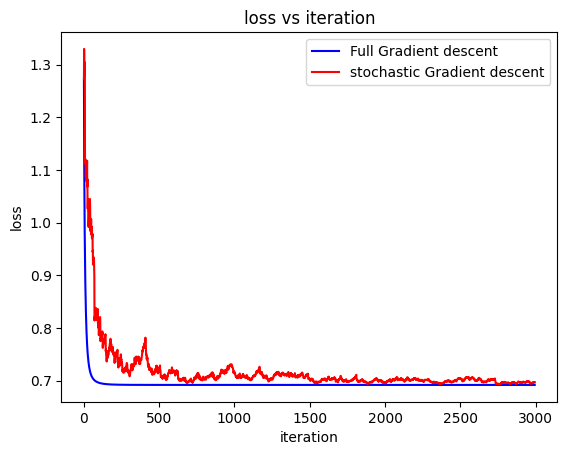

In [ ]:
#plotting the loss vs iteration graph.

n_iteration_1, c_1 = np.shape(f_1)  # array of costs at each iteration
n_iteration_1 = list(range(1, n_iteration_1+1))
n_iteration_1 = np.array(n_iteration_1).reshape((len(n_iteration_1), 1))

n_iteration_2, c_2 = np.shape(f_2)
n_iteration_2 = list(range(1, n_iteration_2+1))
n_iteration_2 = np.array(n_iteration_2).reshape((len(n_iteration_2), 1))

plt.plot(n_iteration_1, f_1, color = 'blue', label = 'Full Gradient descent')
plt.plot(n_iteration_2, f_2, color = 'red', label = 'stochastic Gradient descent')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss vs iteration')
plt.legend()
plt.show()